In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Clustering for dataset exploration

### How many clusters of grain?

In [2]:
df = pd.read_csv('Grains/seeds.csv', header = None)
df.iloc[:, 7].replace({1: 'Kama wheat', 2:'Rosa wheat', 3: 'Canadian wheat'}, inplace = True)
samples = df.iloc[:, 0: 7].values
varieties = df.iloc[:, 7]
df.head()

0      1       2      3      4      5      6           7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  Kama wheat
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  Kama wheat
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  Kama wheat
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  Kama wheat
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  Kama wheat

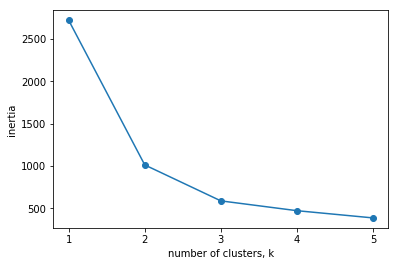

In [3]:
from sklearn.cluster import KMeans
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o');
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks);

### Evaluating the grain clustering

In [4]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters = 3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                      68           9           0
2                       2          60          10


### Scaling fish data for clustering

In [5]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters = 4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

### Clustering the fish data

In [6]:
fish = pd.read_csv('fish.csv', header = None, index_col = 0)
samples = fish.values
species = fish.index.values
fish.head()

1     2     3     4     5     6
0                                         
Bream  242.0  23.2  25.4  30.0  38.4  13.4
Bream  290.0  24.0  26.3  31.2  40.0  13.8
Bream  340.0  23.9  26.5  31.1  39.8  15.1
Bream  363.0  26.3  29.0  33.5  38.0  13.3
Bream  430.0  26.5  29.0  34.0  36.6  15.1

In [7]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1            1     0     19      1
2           33     0      1      0
3            0     0      0     13


### Clustering stocks using KMeans

In [11]:
df = pd.read_csv('company-stock-movements-2010-2015-incl.csv', index_col = 0)
movements = df.values
companies = df.index.values
df.head()

2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
Apple               0.580000   -0.220005   -3.409998   -1.170000    1.680011   
AIG                -0.640002   -0.650000   -0.210001   -0.420000    0.710001   
Amazon             -2.350006    1.260009   -2.350006   -2.009995    2.960006   
American express    0.109997    0.000000    0.260002    0.720002    0.190003   
Boeing              0.459999    1.770000    1.549999    2.690003    0.059997   

                  2010-01-11  2010-01-12  2010-01-13  2010-01-14  2010-01-15  \
Apple              -2.689994   -1.469994    2.779997   -0.680003   -4.999995   
AIG                -0.200001   -1.130001    0.069999   -0.119999   -0.500000   
Amazon             -2.309997   -1.640007    1.209999   -1.790001   -2.039994   
American express   -0.270001    0.750000    0.300004    0.639999   -0.130001   
Boeing             -1.080002    0.360000    0.549999    0.530002   -0.709999   

                  ...  2013-10-16  2013-10-17  2013-10-18  2013-10-21  \
Apple             ...    0.320008    4.519997    2.899987    9.590019   
AIG               ...    0.919998    0.709999    0.119999   -0.480000   
Amazon            ...    2.109985    3.699982    9.570008   -3.450013   
American express  ...    0.680001    2.290001    0.409996   -0.069999   
Boeing            ...    1.559997    2.480003    0.019997   -1.220001   

                  2013-10-22  2013-10-23  2013-10-24  2013-10-25  2013-10-28  \
Apple              -6.540016    5.959976    6.910011   -5.359962    0.840019   
AIG                 0.010002   -0.279998   -0.190003   -0.040001   -0.400002   
Amazon              4.820008   -4.079986    2.579986    4.790009   -1.760009   
American express    0.100006    0.069999    0.130005    1.849999    0.040001   
Boeing              0.480003    3.020004   -0.029999    1.940002    1.130005   

                  2013-10-29  
Apple             -19.589981  
AIG                 0.660000  
Amazon              3.740021  
American express    0.540001  
Boeing              0.309998  

[5 rows x 963 columns]

In [10]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters = 10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

### Which stocks move together?

In [13]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
df.sort_values('labels')

labels                           companies
13       0                   DuPont de Nemours
25       0                   Johnson & Johnson
12       0                             Chevron
10       0                      ConocoPhillips
30       0                          MasterCard
32       0                                  3M
39       0                              Pfizer
8        0                         Caterpillar
53       0                       Valero Energy
23       0                                 IBM
57       0                               Exxon
44       0                        Schlumberger
22       1                                  HP
11       1                               Cisco
14       1                                Dell
33       1                           Microsoft
58       2                               Xerox
20       2                          Home Depot
55       2                         Wells Fargo
16       2                   General Electrics
15       2                                Ford
5        2                     Bank of America
3        2                    American express
1        2                                 AIG
18       2                       Goldman Sachs
26       2                      JPMorgan Chase
36       3                    Northrop Grumman
29       3                     Lookheed Martin
4        3                              Boeing
54       3                            Walgreen
21       4                               Honda
34       4                          Mitsubishi
48       4                              Toyota
45       4                                Sony
7        4                               Canon
24       5                               Intel
51       5                   Texas instruments
50       5  Taiwan Semiconductor Manufacturing
28       6                           Coca Cola
40       6                      Procter Gamble
41       6                       Philip Morris
9        6                   Colgate-Palmolive
56       6                            Wal-Mart
38       6                               Pepsi
27       6                      Kimberly-Clark
37       7                            Novartis
42       7                   Royal Dutch Shell
43       7                                 SAP
6        7            British American Tobacco
46       7                      Sanofi-Aventis
47       7                            Symantec
35       7                            Navistar
49       7                               Total
19       7                     GlaxoSmithKline
52       7                            Unilever
31       7                           McDonalds
59       8                               Yahoo
2        8                              Amazon
17       9                     Google/Alphabet
0        9                               Apple

## Visualization with hierarchical clustering and t-SNE

### Hierarchical clustering of the grain data

In [35]:
df = pd.read_csv('Grains/seeds.csv', header = None)
df.iloc[:, 7].replace({1: 'Kama wheat', 2:'Rosa wheat', 3: 'Canadian wheat'}, inplace = True)
df = df.sample(42)
samples = df.iloc[:, 0: 7].values
varieties = df.iloc[:, 7].values
df.head()

0      1       2      3      4      5      6               7
156  11.34  12.87  0.8596  5.053  2.849  3.347  5.003  Canadian wheat
126  18.65  16.41  0.8698  6.285  3.594  4.391  6.102      Rosa wheat
181  12.46  13.41  0.8706  5.236  3.017  4.987  5.147  Canadian wheat
149  10.79  12.93  0.8107  5.317  2.648  5.462  5.194  Canadian wheat
58   15.38  14.77  0.8857  5.662  3.419  1.999  5.222      Kama wheat

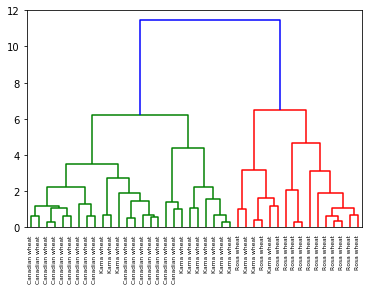

In [41]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6);

### Hierarchies of stocks

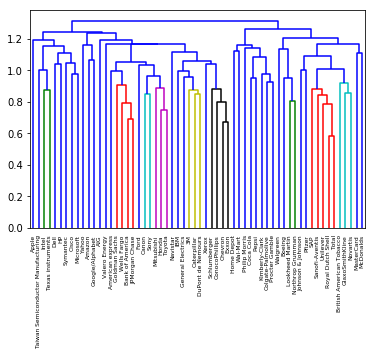

In [43]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method = 'complete')

# Plot the dendrogram
dendrogram(mergings, labels = companies, leaf_rotation = 90, leaf_font_size = 6);

### Different linkage, different hierarchical clustering!

In [57]:
df = pd.read_csv('eurovision-2016.csv')
pt = pd.pivot_table(df, index = 'From country', columns = 'To country', values = 'Jury Points', aggfunc = 'sum')
pt.replace({np.nan: 0}, inplace = True)
samples = pt.values
country_names = pt.index.values

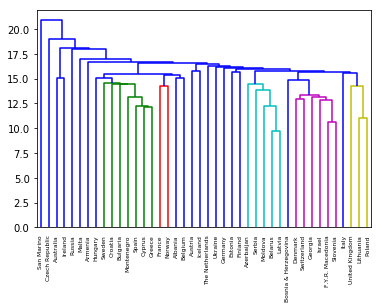

In [59]:
# Calculate the linkage: mergings
mergings = linkage(samples, method = 'single')

# Plot the dendrogram
dendrogram(mergings, labels = country_names, leaf_rotation = 90, leaf_font_size = 6);

### Extracting the cluster labels

In [67]:
df = pd.read_csv('Grains/seeds.csv', header = None)
variety_numbers = df.iloc[:, 7].values
df.iloc[:, 7].replace({1: 'Kama wheat', 2:'Rosa wheat', 3: 'Canadian wheat'}, inplace = True)
samples = df.iloc[:, 0: 7].values
varieties = df.iloc[:, 7].values
df.head()

0      1       2      3      4      5      6           7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  Kama wheat
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  Kama wheat
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  Kama wheat
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  Kama wheat
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  Kama wheat

In [65]:
# Perform the necessary imports
from scipy.cluster.hierarchy import fcluster

# Calculate the linkage: mergings
mergings = linkage(samples, method = 'complete')

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion = 'distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


### t-SNE visualization of grain dataset

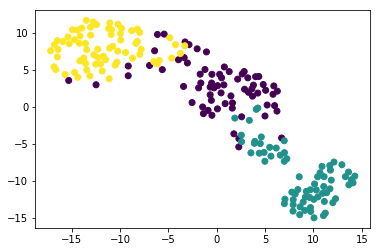

In [68]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = variety_numbers)

### A t-SNE map of the stock market

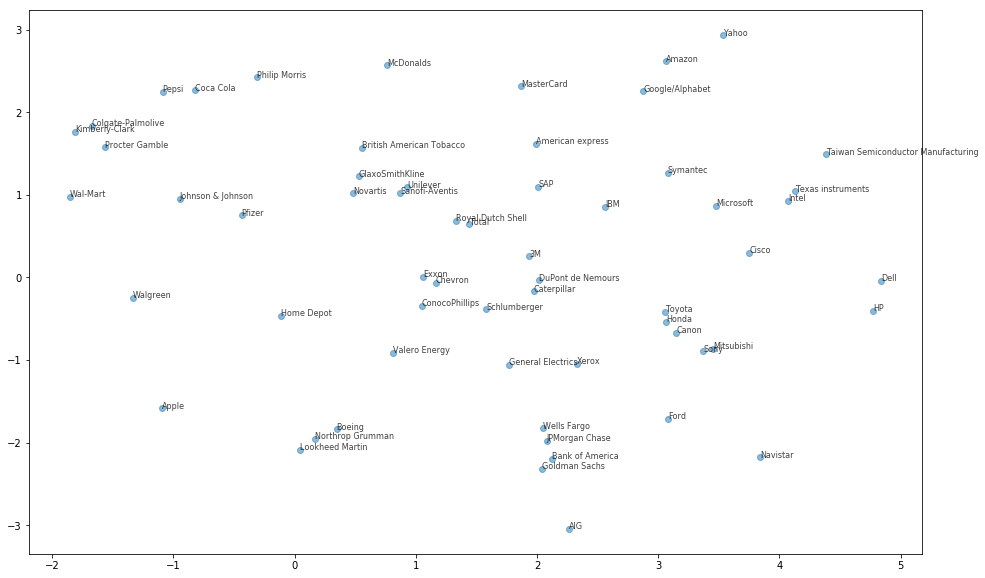

In [72]:
# Import TSNE
from sklearn.manifold import TSNE

plt.figure(figsize = (16,10))
# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:, 0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha = 0.5)
# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)

## Decorrelating your data and dimension reduction

### Correlated data in nature

In [5]:
df = pd.read_csv('Grains/seeds-width-vs-length.csv', header = None)
grains = df.values

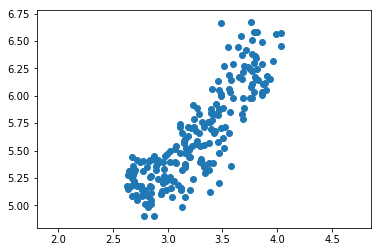

0.8604149377143467


In [6]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

### Decorrelating the grain measurements with PCA

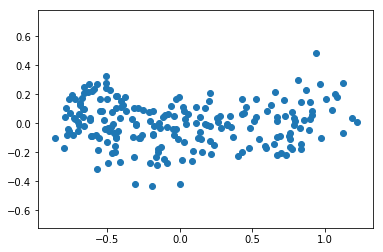

7.474656899453042e-17


In [7]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### The first principal component

(2.549993369175627, 4.113006630824374, 4.795023399558499, 6.778976600441501)

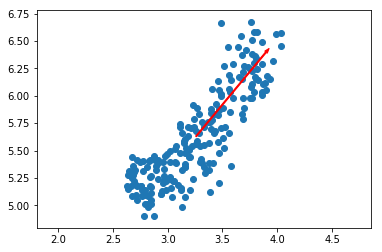

In [8]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0],mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')

### Variance of the PCA features

In [9]:
fish = pd.read_csv('fish.csv', header = None, index_col = 0)
samples = fish.values
species = fish.index.values

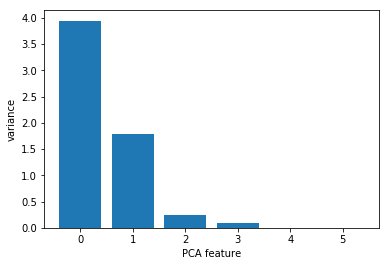

In [11]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_);
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features);

### Dimension reduction of the fish measurements

In [12]:
scaled_samples = scaler.fit_transform(samples)

In [13]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


### A tf-idf word-frequency array

In [14]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Clustering Wikipedia part I

In [29]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

### Clustering Wikipedia part II

In [34]:
df = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv', index_col = 0)

articles = df.T.values
titles = df.columns.values

In [37]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
df.sort_values('label')

label                                        article
49      0                                       Lymphoma
46      0                                     Prednisone
45      0                                    Hepatitis C
44      0                                           Gout
43      0                                       Leukemia
42      0                                    Doxycycline
41      0                                    Hepatitis B
40      0                                    Tonsillitis
47      0                                          Fever
48      0                                     Gabapentin
58      1                                         Sepsis
51      1                                     Nate Ruess
52      1                                     The Wanted
53      1                                   Stevie Nicks
54      1                                 Arctic Monkeys
55      1                                  Black Sabbath
56      1                                       Skrillex
57      1                          Red Hot Chili Peppers
50      1                                   Chad Kroeger
59      1                                    Adam Levine
19      2  2007 United Nations Climate Change Conference
18      2  2010 United Nations Climate Change Conference
17      2  Greenhouse gas emissions by the United States
16      2                                        350.org
15      2                                 Kyoto Protocol
14      2                                 Climate change
13      2                               Connie Hedegaard
12      2                                   Nigel Lawson
11      2       Nationally Appropriate Mitigation Action
10      2                                 Global warming
37      3                                       Football
36      3              2014 FIFA World Cup qualification
35      3                Colombia national football team
34      3                             Zlatan Ibrahimović
30      3                  France national football team
32      3                                   Arsenal F.C.
31      3                              Cristiano Ronaldo
38      3                                         Neymar
33      3                                 Radamel Falcao
39      3                                  Franck Ribéry
0       4                                       HTTP 404
8       4                                        Firefox
1       4                                 Alexa Internet
2       4                              Internet Explorer
3       4                                    HTTP cookie
4       4                                  Google Search
5       4                                         Tumblr
6       4                    Hypertext Transfer Protocol
7       4                                  Social search
9       4                                       LinkedIn
27      5                                 Dakota Fanning
20      5                                 Angelina Jolie
21      5                             Michael Fassbender
22      5                              Denzel Washington
23      5                           Catherine Zeta-Jones
24      5                                   Jessica Biel
25      5                                  Russell Crowe
26      5                                     Mila Kunis
28      5                                  Anne Hathaway
29      5                               Jennifer Aniston

## Discovering interpretable features

### NMF applied to Wikipedia articles

In [39]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components = 6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
nmf_features

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.40467493e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.66607807e-01],
       [3.82048140e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.98648686e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.81741726e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.85519529e-01],
       [1.29288344e-02, 1.37894042e-02, 7.76326735e-03, 3.34467033e-02,
        0.00000000e+00, 3.34523978e-01],
       [0.00000000e+00, 0.00000000e+00, 2.06743565e-02, 0.00000000e+00,
        6.04522527e-03, 3.59062769e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.90979175e-01],
       [1.54271047e-02, 1.42821573e-02, 3.76635583e-03, 2.37098842e-02,
        2.62634977e-02, 

### NMF features of the Wikipedia articles

In [40]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index = titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway', :])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington', :])

0    0.003845
1    0.000000
2    0.000000
3    0.575680
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422357
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


### NMF learns topics of documents

In [41]:
df = pd.read_csv('Wikipedia articles/wikipedia-vocabulary-utf8.txt', header = None)
words = df.values

In [42]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns = words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3, :]

# Print result of nlargest
component.nlargest()

(6, 13125)


(film,)       0.627910
(award,)      0.253145
(starred,)    0.245297
(role,)       0.211462
(actress,)    0.186408
Name: 3, dtype: float64

### Explore the LED digits dataset

In [44]:
df = pd.read_csv('lcd-digits.csv')
samples = df.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


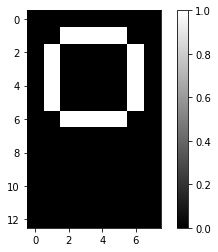

In [45]:
# Select the 0th row: digit
digit = samples[0, :]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()

### NMF learns the parts of images

In [47]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

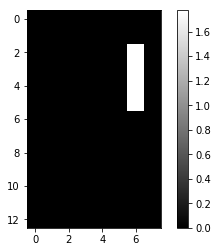

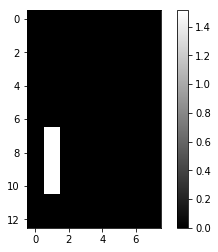

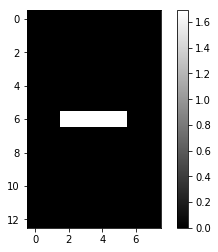

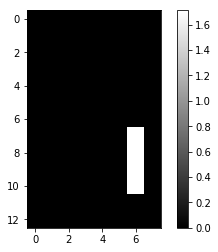

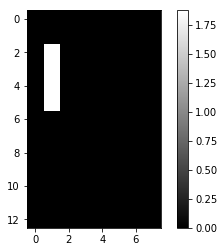

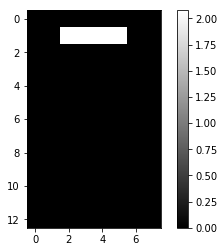

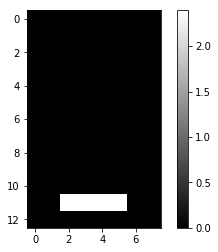

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [48]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0, :]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts

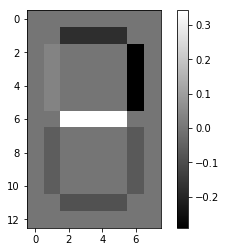

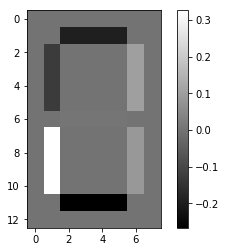

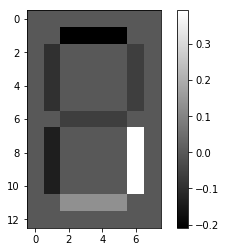

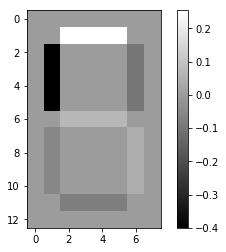

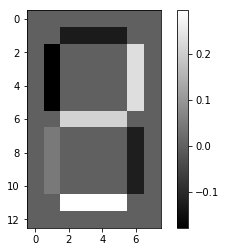

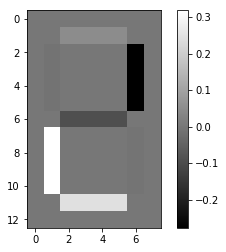

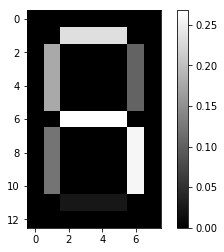

In [49]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components = 7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

### Which articles are similar to 'Cristiano Ronaldo'?

In [50]:
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo', :]

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommend musical artists part I

In [62]:
df1 = pd.read_csv('Musical artists/scrobbler-small-sample.csv', header = 0)
df1.head()

user_offset  artist_offset  playcount
0            1             79         58
1            1             84         80
2            1             86        317
3            1             89         64
4            1             96        159

In [64]:
df2 = pd.read_csv('Musical artists/artists.csv', header = None)
df2['id'] = df2.index
df2.columns = ['name', 'id']
df2.head()

name  id
0  Massive Attack   0
1         Sublime   1
2    Beastie Boys   2
3      Neil Young   3
4   Dead Kennedys   4

In [65]:
df = pd.merge(df1, df2, how = 'left', left_on = 'artist_offset', right_on = 'id')
df.head()

user_offset  artist_offset  playcount                      name  id
0            1             79         58                   Misfits  79
1            1             84         80            The Beach Boys  84
2            1             86        317  Bob Marley & the Wailers  86
3            1             89         64                     Mirah  89
4            1             96        159                Rilo Kiley  96

In [76]:
pt = pd.pivot_table(data = df, index = 'name', columns = 'user_offset', values = 'playcount', aggfunc = 'sum')
pt.replace(np.nan, 0, inplace = True)
artists = pt.values
artist_names = pt.index.values

In [75]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components = 20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

### Recommend musical artists part II

In [77]:
# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.955185
Van Morrison         0.869482
Leonard Cohen        0.862630
Bob Dylan            0.854943
dtype: float64
